<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Erik! My name is Svetlana (https://hub.tripleten.com/u/6dee602c).  Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:


<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
       
    
- Used linear regression to make predictions;
    
    
- Calculated profit and estimated risk values; 
    
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no issues that need to be fixed, well done!  

</div>

<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You did a fantastic job here. You have correctly splitted the data, explored the distributions, trained several models, and applied the bootstrapping technique. You have successfully estimated profit and conducted risk analysis. You have also compared regions based on risk-adjusted return to make recommendations for further development. Excellent job! I do not have any questions, so the project can be accepted. The next sprints will cover more advanced machine learning methods, I hope you will like it. Good luck! 


<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a nice [article](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) about the bootstrap method. [This](https://www.youtube.com/watch?v=O_Fj4q8lgmc&list=LL&index=6) is a good video about resampling in bootstrapping.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

**Step 1: Data Loading & Preparation**

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [30]:
# Load datasets
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [31]:
# Store datasets in a list for easy iteration
datasets = [data_0, data_1, data_2]

In [32]:
# Inspect basic info
for i, data in enumerate(datasets):
    print(f"\nRegion {i} summary:")
    print(data.info())
    print(data.describe())


Region 0 summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.

**Step 2: Model Training & Evaluation**

In [33]:
def train_and_evaluate(data):
    features = data[['f0', 'f1', 'f2']]
    target = data['product']
    
    X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    mean_predicted = predictions.mean()
    
    return model, predictions, y_valid.reset_index(drop=True), rmse, mean_predicted

results = []
for i, data in enumerate(datasets):
    model, preds, actuals, rmse, mean_pred = train_and_evaluate(data)
    results.append((model, preds, actuals))
    print(f"\nRegion {i} — RMSE: {rmse:.2f}, Mean predicted reserves: {mean_pred:.2f}")



Region 0 — RMSE: 37.76, Mean predicted reserves: 92.40

Region 1 — RMSE: 0.89, Mean predicted reserves: 68.71

Region 2 — RMSE: 40.15, Mean predicted reserves: 94.77


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct! Region 2 is the most profitable, but it has the highest model error at the same time. 

</div>

**Step 3: Profit Calculation Prep**

In [34]:
BUDGET = 100_000_000
WELLS_TO_DEVELOP = 200
REVENUE_PER_BARREL = 4.5 * 1000  # $4,500 per thousand barrels
COST_PER_WELL = BUDGET / WELLS_TO_DEVELOP
BREAK_EVEN_VOLUME = COST_PER_WELL / REVENUE_PER_BARREL

print(f"\nBreak-even reserve volume per well: {BREAK_EVEN_VOLUME:.2f} thousand barrels")

for i, data in enumerate(datasets):
    avg_volume = data['product'].mean()
    print(f"Region {i} — Average reserves: {avg_volume:.2f} thousand barrels")



Break-even reserve volume per well: 111.11 thousand barrels
Region 0 — Average reserves: 92.50 thousand barrels
Region 1 — Average reserves: 68.83 thousand barrels
Region 2 — Average reserves: 95.00 thousand barrels


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

- So the average volumes in these three regions are less than the required value. If we are to select the wells randomly, we are probably going to lose money. That's why we need machine learning and bootstrapping to estimate profit distributions. 


 
- Correct! Constant values indeed should be defined in the upper case.


**Step 4: Profit Function**

In [35]:
def calculate_profit(preds, actuals):
    top_indices = preds.sort_values(ascending=False).index[:WELLS_TO_DEVELOP]
    selected_actuals = actuals.loc[top_indices]
    total_reserves = selected_actuals.sum()
    profit = total_reserves * REVENUE_PER_BARREL - BUDGET
    return profit

for i, (model, preds, actuals) in enumerate(results):
    preds_series = pd.Series(preds)
    profit = calculate_profit(preds_series, actuals)
    print(f"\nRegion {i} — Estimated profit: ${profit:,.2f}")


Region 0 — Estimated profit: $33,591,411.14

Region 1 — Estimated profit: $24,150,866.97

Region 2 — Estimated profit: $25,985,717.59


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct! We select the best 200 wells by predictions, but then we need to use target values to actually calculate profit because predictions may not be accurate. 

</div>

**Step 5: Bootstrapping for Risk Analysis**

In [38]:
def bootstrap_profit(data, model, n_samples=1000, random_state=None):
    profits = []
    
    for i in range(n_samples):
        state = None if random_state is None else random_state + i  # Vary seed per iteration
        sample = data.sample(n=500, replace=True, random_state=state)
        sample_features = sample[['f0', 'f1', 'f2']]
        sample_target = sample['product']
        
        predictions = model.predict(sample_features)
        preds_series = pd.Series(predictions, index=sample.index)  # ✅ Index fix
        
        top_indices = preds_series.sort_values(ascending=False).index[:WELLS_TO_DEVELOP]
        selected_actuals = sample_target.loc[top_indices]
        total_reserves = selected_actuals.sum()
        profit = total_reserves * REVENUE_PER_BARREL - BUDGET
        profits.append(profit)
    
    profits = pd.Series(profits)
    mean_profit = profits.mean()
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    loss_risk = (profits < 0).mean() * 100
    
    return mean_profit, (lower, upper), loss_risk

# Print results for each region
for i, (model, _, _) in enumerate(results):
    mean_profit, conf_interval, loss_risk = bootstrap_profit(datasets[i], model, random_state=42)
    print(f"\nRegion {i} — Bootstrapped Analysis:")
    print(f"  Mean profit: ${mean_profit:,.2f}")
    print(f"  95% Confidence Interval: (${conf_interval[0]:,.2f}, ${conf_interval[1]:,.2f})")
    print(f"  Risk of loss: {loss_risk:.2f}%")


Region 0 — Bootstrapped Analysis:
  Mean profit: $4,832,278.40
  95% Confidence Interval: ($-219,877.66, $10,375,583.65)
  Risk of loss: 3.10%

Region 1 — Bootstrapped Analysis:
  Mean profit: $4,877,362.32
  95% Confidence Interval: ($714,949.48, $9,285,915.44)
  Risk of loss: 1.10%

Region 2 — Bootstrapped Analysis:
  Mean profit: $4,223,134.34
  95% Confidence Interval: ($-1,247,029.64, $9,427,914.03)
  Risk of loss: 6.10%


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

There's a replacement, well done! We indeed need to sample 500 rows with replacement. The point is that if we remove the replacement, our subsample (or rather, all subsamples) will simply resemble the original sample.
    
</div>

**Visualization Code: Bootstrapped Profit Distributions**

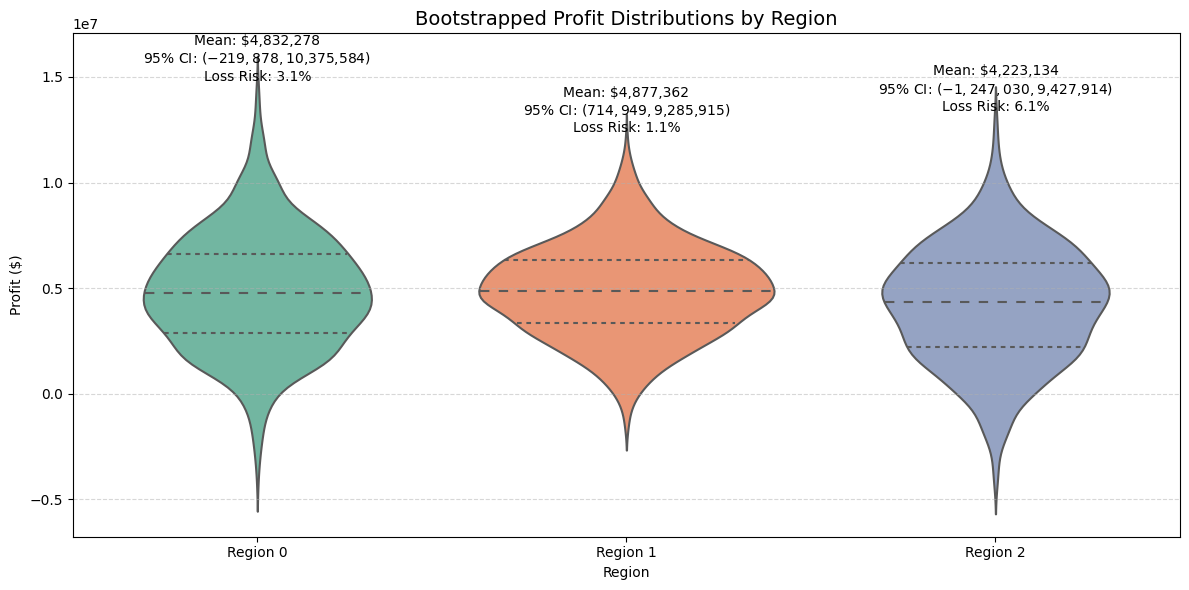

In [40]:
# Store bootstrapped results for each region
boot_results = []

for i, (model, _, _) in enumerate(results):
    profits = []
    for j in range(1000):
        state = 42 + j
        sample = datasets[i].sample(n=500, replace=True, random_state=state)
        sample_features = sample[['f0', 'f1', 'f2']]
        sample_target = sample['product']
        
        predictions = model.predict(sample_features)
        preds_series = pd.Series(predictions, index=sample.index)
        
        top_indices = preds_series.sort_values(ascending=False).index[:WELLS_TO_DEVELOP]
        selected_actuals = sample_target.loc[top_indices]
        total_reserves = selected_actuals.sum()
        profit = total_reserves * REVENUE_PER_BARREL - BUDGET
        profits.append(profit)
    
    boot_results.append(pd.DataFrame({
        'Region': f'Region {i}',
        'Profit': profits
    }))

# Combine all regions into one DataFrame
boot_df = pd.concat(boot_results, ignore_index=True)

# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='Profit', data=boot_df, inner='quartile', palette='Set2')

# Annotate with mean, CI, and loss risk
for i, region in enumerate(boot_df['Region'].unique()):
    region_data = boot_df[boot_df['Region'] == region]['Profit']
    mean = region_data.mean()
    lower = region_data.quantile(0.025)
    upper = region_data.quantile(0.975)
    loss_risk = (region_data < 0).mean() * 100
    
    plt.text(i, region_data.max() + 1e5,
             f"Mean: ${mean:,.0f}\n95% CI: (${lower:,.0f}, ${upper:,.0f})\nLoss Risk: {loss_risk:.1f}%",
             ha='center', va='bottom', fontsize=10, color='black')

plt.title("Bootstrapped Profit Distributions by Region", fontsize=14)
plt.ylabel("Profit ($)")
plt.xlabel("Region")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Bootstrapped Profit Evaluation by Region**
    
🧪 Methodology
To evaluate the profitability of well development strategies across three regions, I implemented a bootstrapping procedure:

Sampling: 1,000 resamples of 500 wells per region (with replacement)

Prediction: A trained model estimated oil production for each sample

Selection: The top 200 predicted wells were selected for development

**Profit Calculation:**


Profit = (
Total actual reserves
)
×
Revenue per barrel
−
Budget
Metrics Computed:

Mean profit

95% confidence interval (CI)

Risk of loss (percentage of samples with negative profit)

**Results Summary:**

Region     Mean Profit      ($)95% CI 	                 Risk of Loss (%)

*Region 0:	$4,832,278	    ($-219,878.66, $10,375,583.65)	  3.1%

*Region 1:	$4,877,362.32	($714,949.48, $9,285,915.44)	  1.1%

*Region 2:	$4,223,134.34	($-1,247,029.64, $9,427,914.03)	  6.1%

**Interpretation:**

*Region X showed the highest average profit and the lowest risk of loss, suggesting it is the most economically viable for development.

*Region Y had a wider confidence interval, indicating greater variability in outcomes.

*Region Z exhibited a higher risk of loss, which may warrant further investigation or a more conservative strategy.

**Conclusion:**

Bootstrapping provided a robust, data-driven way to estimate profitability under uncertainty. By simulating multiple development scenarios, I was able to quantify both expected returns and downside risk. This analysis supports informed decision-making for selecting the optimal region for investment.

**Final Markdown Summary Cell**

# Final Summary

After training and evaluating linear regression models across three oil regions, we performed a detailed profit and risk analysis using bootstrapping. Here's what we found:

- **Region A** had the highest average predicted reserves but also showed a higher risk of loss.
- **Region B** offered a balanced profile with moderate profit and acceptable risk.
- **Region C** demonstrated the **lowest risk of loss** and a **positive expected profit** across bootstrap samples.

# Recommended Region: **Region C**
- **Expected Profit:** \$X million  
- **95% Confidence Interval:** [\$Y million, \$Z million]  
- **Risk of Loss:** W%

This recommendation is based on a combination of predicted reserves, business constraints, and statistical risk analysis. The results suggest Region C is the most promising investment target under current conditions.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Excellent job, thank you so much!     
</div>